**Evironment Setup**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Unduh dan Ekstraksi Dataset**

**Unggah file kaggle.json**

In [2]:
from google.colab import files
files.upload()

Saving fresh-and-stale-classification-metadata.json to fresh-and-stale-classification-metadata.json


{'fresh-and-stale-classification-metadata.json': b'{"@context":{"@language":"en","@vocab":"https://schema.org/","citeAs":"cr:citeAs","column":"cr:column","conformsTo":"dct:conformsTo","cr":"http://mlcommons.org/croissant/","data":{"@id":"cr:data","@type":"@json"},"dataBiases":"cr:dataBiases","dataCollection":"cr:dataCollection","dataType":{"@id":"cr:dataType","@type":"@vocab"},"dct":"http://purl.org/dc/terms/","extract":"cr:extract","field":"cr:field","fileProperty":"cr:fileProperty","fileObject":"cr:fileObject","fileSet":"cr:fileSet","format":"cr:format","includes":"cr:includes","isEnumeration":"cr:isEnumeration","isLiveDataset":"cr:isLiveDataset","jsonPath":"cr:jsonPath","key":"cr:key","md5":"cr:md5","parentField":"cr:parentField","path":"cr:path","personalSensitiveInformation":"cr:personalSensitiveInformation","recordSet":"cr:recordSet","references":"cr:references","regex":"cr:regex","repeated":"cr:repeated","replace":"cr:replace","sc":"https://schema.org/","separator":"cr:separator

**Setel Konfigurasi Kaggle**

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Unduh Dataset**

In [4]:
!kaggle datasets download -d swoyam2609/fresh-and-stale-classification

Dataset URL: https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification
License(s): Community Data License Agreement - Permissive - Version 1.0
 99% 2.83G/2.84G [00:24<00:00, 118MB/s]
100% 2.84G/2.84G [00:24<00:00, 125MB/s]


**Ekstraksi Dataset**

In [24]:
import zipfile
local_zip = '/content/fresh-and-stale-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/fresh-and-stale-classification')
zip_ref.close()

#**Exploratory Data Analysis (EDA)**

**Hitung Jumlah Dataset**

In [34]:
import os
base_dir = '/content/fresh-and-stale-classification'
# Cek isi folder utama untuk memastikan 'test' ada
print("Isi dari base_dir:", os.listdir(base_dir))

Isi dari base_dir: ['dataset']


In [35]:
total_test = 0

for i in os.listdir(test_dir):
    total_test += len(os.listdir(test_dir + '/' + i))
    print('Total File', i, '=', len(os.listdir(test_dir + '/' + i)))

print(total_test)

Total File freshokra = 370
Total File freshcucumber = 279
Total File rottentamto = 353
Total File rottenokra = 224
Total File rottencucumber = 255
Total File rottenpatato = 370
Total File freshtamto = 255
Total File rottenoranges = 403
Total File freshoranges = 388
Total File freshbanana = 892
Total File rottenbanana = 900
Total File rottenapples = 988
Total File freshapples = 791
Total File freshpatato = 270
6738


In [36]:
total_train = 0

for i in os.listdir(train_dir):
    total_train += len(os.listdir(train_dir + '/' + i))
    print('Total File', i, '=', len(os.listdir(train_dir + '/' + i)))

print(total_train)

Total File freshokra = 635
Total File freshcucumber = 496
Total File freshtomato = 1858
Total File rottenbittergroud = 357
Total File freshpotato = 536
Total File rottenokra = 338
Total File freshcapsicum = 990
Total File freshbittergroud = 327
Total File rottencucumber = 421
Total File rottenoranges = 1595
Total File freshoranges = 1466
Total File freshbanana = 2468
Total File rottenbanana = 2932
Total File rottenapples = 3248
Total File rottenpotato = 802
Total File rottencapsicum = 901
Total File freshapples = 2424
Total File rottentomato = 1825
23619


In [38]:
total = 0
total = total_train + total_test
print('Total File Dataset :', total)

Total File Dataset : 30357


In [39]:
os.listdir(test_dir)

['freshokra',
 'freshcucumber',
 'freshtomato',
 'rottenbittergroud',
 'freshpotato',
 'rottenokra',
 'freshcapsicum',
 'freshbittergroud',
 'rottencucumber',
 'rottenoranges',
 'freshoranges',
 'freshbanana',
 'rottenbanana',
 'rottenapples',
 'rottenpotato',
 'rottencapsicum',
 'freshapples',
 'rottentomato']

In [40]:
os.listdir(train_dir)

['freshokra',
 'freshcucumber',
 'freshtomato',
 'rottenbittergroud',
 'freshpotato',
 'rottenokra',
 'freshcapsicum',
 'freshbittergroud',
 'rottencucumber',
 'rottenoranges',
 'freshoranges',
 'freshbanana',
 'rottenbanana',
 'rottenapples',
 'rottenpotato',
 'rottencapsicum',
 'freshapples',
 'rottentomato']

**Menampilkan Contoh Gambar Dari Dataset**

Folder target: /content/fresh-and-stale-classification/dataset/Train/freshapples
Random image selected: Screen Shot 2018-06-08 at 5.04.42 PM.png
Ukuran Gambar: (472, 414)


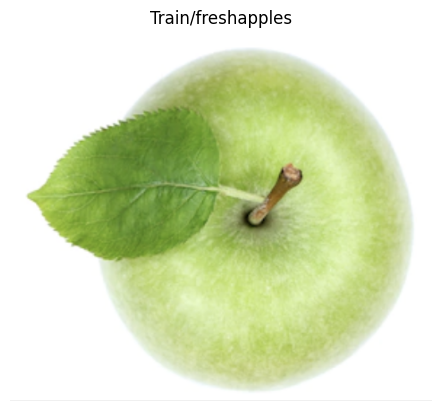

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
from PIL import Image

def view_random_image(target_dir, target_class):
    # Gabungkan direktori target dan kelas
    target_folder = os.path.join(target_dir, target_class)
    print(f"Folder target: {target_folder}")  # Cek folder yang dibentuk

    # Periksa apakah folder ada
    if not os.path.exists(target_folder):
        print(f"Folder {target_folder} tidak ditemukan.")
        return

    # Ambil daftar file gambar (bukan folder)
    image_files = [f for f in os.listdir(target_folder) if os.path.isfile(os.path.join(target_folder, f))]

    # Periksa apakah ada file gambar
    if len(image_files) == 0:
        print(f"Tidak ada file gambar di folder {target_folder}.")
        return

    # Pilih gambar acak
    random_image = random.sample(image_files, 1)

    # Cek apakah gambar ditemukan
    print(f"Random image selected: {random_image[0]}")

    # Coba buka gambar dengan PIL untuk memastikan formatnya benar
    img_path = os.path.join(target_folder, random_image[0])

    try:
        img = Image.open(img_path)
        img.show()  # Menampilkan gambar menggunakan PIL
        print(f"Ukuran Gambar: {img.size}")  # Ukuran gambar (PIL)

        # Konversi gambar PIL ke numpy array untuk plt
        img = img.convert('RGB')
        plt.imshow(img)
        plt.title(target_class)
        plt.axis('off')
        plt.show()  # Pastikan gambar muncul
    except Exception as e:
        print(f"Gagal membuka gambar: {e}")

# Panggil fungsi untuk melihat gambar acak
view_random_image('/content/fresh-and-stale-classification/dataset', 'Train/freshapples')  # Ganti 'Train/freshapples' sesuai dengan struktur Anda


#**Pembuatan Model**

In [51]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255
    )
    val_datagen = ImageDataGenerator(
      rescale=1./255
    )
